## Data exploration and Model creation

- Plotting Relationships between variables
- Using an RFM Analysis to build our data model

In [1]:
import xlrd
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

import os

C:\Users\POWER-HOUSE\Anaconda3\envs\tensor\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\POWER-HOUSE\Anaconda3\envs\tensor\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\POWER-HOUSE\Anaconda3\envs\tensor\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# define file name 
filename = 'KPMG_Sprocket_ltd.xlsx' 

In [3]:
# read in excel file
print(pd.ExcelFile(filename).sheet_names)

['Title Sheet', 'Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress']


In [4]:
#read customer demographics sheet 

cust_demo = pd.read_excel(filename, header=1, sheet_name = 'CustomerDemographic', index_col = 0)
cust_demo.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
customer_id,,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


 ### Data Cleaning

#### Customer Demographic

In [5]:
# Dropping irrelevant columns

cust_demo = cust_demo.drop(['first_name', 'last_name', 'default', 'job_title'], axis= 1)


In [6]:
# Transforming data records 


# Adjust gender values
cust_demo['gender'].replace(['F', 'Femal'], 'Female', inplace=True) 
cust_demo['gender'].replace('M' , 'Male', inplace=True)
cust_demo['gender'].replace('U', 'Unknown', inplace=True)

# Map deceased indicator values
cust_demo['deceased_indicator'].replace(['N'], 0, inplace=True)
cust_demo['deceased_indicator'].replace(['Y'], 1, inplace=True)

# Map car ownership
cust_demo['owns_car'].replace('Yes', 1, inplace=True)
cust_demo['owns_car'].replace('No', 0, inplace=True)

cust_demo = cust_demo[cust_demo['DOB'] != cust_demo.DOB.min()]

#drop column since only two records are irrelevant (deceased)
#cust_demo[cust_demo['deceased_indicator'] == 0]
cust_demo = cust_demo.drop(['deceased_indicator'], axis=1) 

cust_demo_clean = cust_demo.dropna()
cust_demo_clean.head()


,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure
customer_id,,,,,,,
1,Female,93,1953-10-12,Health,Mass Customer,1,11.0
2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0
3,Male,61,1954-01-20,Property,Mass Customer,1,15.0
4,Male,33,1961-10-03,IT,Mass Customer,0,7.0
6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0


In [57]:
# creating an age attribute from DOB
import math 

cust_demo_clean['age'] = (dt.datetime.now() - cust_demo_clean['DOB']) / np.timedelta64(1, 'Y')

cust_demo_clean['age_class'] = ((round(cust_demo_clean['age'] / 10)) * 10).astype(int)

C:\Users\POWER-HOUSE\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\POWER-HOUSE\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
# floor age values

cust_demo_clean['age'] = cust_demo_clean['age'].apply(np.floor)

    
cust_demo_clean.head()


C:\Users\POWER-HOUSE\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_class
customer_id,,,,,,,,,
1,Female,93,1953-10-12,Health,Mass Customer,1,11.0,67.0,70
2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0,40.0,40
3,Male,61,1954-01-20,Property,Mass Customer,1,15.0,66.0,70
4,Male,33,1961-10-03,IT,Mass Customer,0,7.0,59.0,60
6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0,54.0,50


#### Customer Address

In [10]:
# Read customer address sheet 

cust_addr = pd.read_excel(filename, header=1, sheet_name = 'CustomerAddress', index_col = 0)
cust_addr.head()

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,New South Wales,Australia,10
2,6 Meadow Vale Court,2153,New South Wales,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,New South Wales,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9


In [11]:
# Cleaning state values 

cust_addr['state'].replace('New South Wales', 'NSW', inplace=True)
cust_addr['state'].replace('Victoria', 'VIC', inplace=True)
cust_addr = cust_addr.dropna()
cust_addr.head()

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,NSW,Australia,10
2,6 Meadow Vale Court,2153,NSW,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,NSW,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9


In [59]:
# Merge demographics and Address data

demo_addr = pd.merge(cust_demo_clean, cust_addr, right_index = True, left_index = True)
demo_addr = demo_addr.dropna()
demo_addr.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation
customer_id,,,,,,,,,,,,,,
1,Female,93,1953-10-12,Health,Mass Customer,1,11.0,67.0,70,060 Morning Avenue,2016,NSW,Australia,10
2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0,40.0,40,6 Meadow Vale Court,2153,NSW,Australia,10
4,Male,33,1961-10-03,IT,Mass Customer,0,7.0,59.0,60,0 Holy Cross Court,4211,QLD,Australia,9
6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0,54.0,50,9 Oakridge Court,3216,VIC,Australia,9
7,Female,6,1976-02-23,Financial Services,Affluent Customer,1,11.0,44.0,40,4 Delaware Trail,2210,NSW,Australia,9


### Transactions

In [18]:
# Getting Transactions

trans = pd.read_excel(filename, header=1, sheet_name='Transactions', index_col=0)
trans = trans.sort_values('customer_id')
trans.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0
18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0
16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,37838.0
5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0


In [19]:
#  Check blank values

trans.isna().sum()

product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [20]:
#Convert product sold date to date time

trans['product_first_sold_date'] = pd.TimedeltaIndex(trans['product_first_sold_date'], unit='d') + dt.datetime(1900,1,1)
trans.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-07
18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-11
16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-07
5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-23
13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-11


In [23]:
#Drop empty records 

print(trans.shape)

trans_clean = trans.dropna()
trans_clean.shape

(20000, 12)


(19445, 12)

In [25]:
# Analysing Transaction data


most_recent_purchase = trans_clean['transaction_date'].max()  # Get most recent purchase

# Evaluate days since lasyt purchase was made
trans_clean['days_since_last_purchase'] = most_recent_purchase - trans_clean['transaction_date'] 
trans_clean['days_since_last_purchase'] /= np.timedelta64(1, 'D')

# Claculate profit
trans_clean['profit'] = trans_clean['list_price'] - trans_clean['standard_cost']

trans_clean.head()


C:\Users\POWER-HOUSE\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\POWER-HOUSE\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\POWER-HOUSE\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,days_since_last_purchase,profit
transaction_id,,,,,,,,,,,,,,
14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-07,278.0,75.75
18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-11,276.0,509.97
16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-07,21.0,75.14
5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-23,233.0,189.28
13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-11,312.0,17.87


## RFM Analysis

 RFM analysis is a data-driven customer behavior segmentation technique where RFM stands for recency, frequency, and monetary value.

 The idea is to segment customers based on when their last purchase was(Recency), how often they’ve purchased in the past(Frequency), and how much they spent(Monetary)

In [27]:
# Rfm table

'''
    In our RFM Analysis of the given dataset ;
    Recency - Days since last purchase
    Frequency - Number of types a particular customer made a transaction
    Monetary Value - Profits made from that customer
    
'''

rfm_table = trans_clean.groupby('customer_id').agg({
    'days_since_last_purchase': lambda x: x.min(),
    'customer_id': lambda x: len(x),
    'profit': lambda x: x.sum()
})

rfm_table.head()

,days_since_last_purchase,customer_id,profit
customer_id,,,
1,7.0,11,3018.09
2,128.0,3,2226.26
3,102.0,7,3290.21
4,195.0,2,220.57
5,16.0,6,2394.94


In [30]:
# Rename headers 

rfm_table.rename(columns= {
    'days_since_last_purchase' : 'recency',
    'customer_id' : 'frequency',
    'profit' : 'monetary_value'
    
}, inplace = True)

rfm_table.head()

,recency,frequency,monetary_value
customer_id,,,
1,7.0,11,3018.09
2,128.0,3,2226.26
3,102.0,7,3290.21
4,195.0,2,220.57
5,16.0,6,2394.94


In [32]:
# Calculating quartile values 

quartiles = rfm_table.quantile(q=[0.25,0.50,0.75])
quartiles

,recency,frequency,monetary_value
0.25,18.0,4.0,1797.43
0.50,45.0,5.0,2798.99
0.75,88.0,7.0,4122.44


In [33]:
# Creating Encoder functions that categorisizes into 4 values ( 1 - 4)

def rEncoder(x, p, d):  # 1 - low recency , 4 - high recency
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 4
    
def fEncoder(x, p, d):  #  1 - high recency / monetary value, 4 - low recency/monetary value
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 1


In [35]:
#Applying Encoder to RFM Table to create RFM scores 

rfm_seg = rfm_table
rfm_seg['r_score'] = rfm_seg['recency'].apply(rEncoder, args=('recency', quartiles))
rfm_seg['f_score'] = rfm_seg['frequency'].apply(fEncoder, args=('frequency', quartiles))
rfm_seg['m_score'] = rfm_seg['monetary_value'].apply(fEncoder, args=('monetary_value', quartiles))

rfm_seg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score
customer_id,,,,,,
1,7.0,11,3018.09,1,1,3
2,128.0,3,2226.26,4,4,2
3,102.0,7,3290.21,4,3,3
4,195.0,2,220.57,4,4,4
5,16.0,6,2394.94,1,3,2


In [36]:
# Calculating total rfm scores and classes

rfm_seg['rfm_class'] = 100 * rfm_seg['r_score'] + 10 * rfm_seg['f_score'] + rfm_seg['m_score']
rfm_seg['total_score'] = rfm_seg['r_score'] + rfm_seg['f_score'] + rfm_seg['m_score']
rfm_seg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score
customer_id,,,,,,,,
1,7.0,11,3018.09,1,1,3,113,5
2,128.0,3,2226.26,4,4,2,442,10
3,102.0,7,3290.21,4,3,3,433,10
4,195.0,2,220.57,4,4,4,444,12
5,16.0,6,2394.94,1,3,2,132,6


In [39]:
# Calculate measures of quartiles 

rfm_quartiles = (rfm_seg['rfm_class'].min(), rfm_seg['rfm_class'].quantile(q=0.25),
                 rfm_seg['rfm_class'].median(), rfm_seg['rfm_class'].quantile(q=0.75), 
                 rfm_seg['rfm_class'].max())
rfm_quartiles


(111, 144.0, 244.0, 344.0, 444)

In [52]:
#Encoding customer tier based on rfm class and quartiles

def RFMClassEncoder(x, p, d):
    if x <= d[0]:
        return 'Diamond'
    elif x <= d[1]:
        return 'Gold'
    elif x <= d[2]: 
        return 'Silver'
    else: 
        return 'Bronze'

rfm_seg['customer_tier'] = rfm_seg['rfm_class'].apply(RFMClassEncoder, args=('rfm_class', rfm_quartiles))

rfm_seg

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_tier
customer_id,,,,,,,,,
1,7.0,11,3018.090000,1,1,3,113,5,Gold
2,128.0,3,2226.260000,4,4,2,442,10,Bronze
3,102.0,7,3290.210000,4,3,3,433,10,Bronze
4,195.0,2,220.570000,4,4,4,444,12,Bronze
5,16.0,6,2394.940000,1,3,2,132,6,Gold
...,...,...,...,...,...,...,...,...,...
3497,52.0,3,1648.320000,3,4,4,344,11,Bronze
3498,127.0,6,3147.330000,4,3,3,433,10,Bronze
3499,51.0,7,4955.250000,3,3,1,331,7,Bronze


In [60]:
# Merging address, demographics and transactions

demo_addr_trans = pd.merge(rfm_seg, demo_addr , left_index=True, right_index=True)

demo_addr_trans.columns



Index(['recency', 'frequency', 'monetary_value', 'r_score', 'f_score',
       'm_score', 'rfm_class', 'total_score', 'customer_tier', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_industry_category',
       'wealth_segment', 'owns_car', 'tenure', 'age', 'age_class', 'address',
       'postcode', 'state', 'country', 'property_valuation'],
      dtype='object')

In [61]:
demo_addr_trans.shape

(2850, 23)

### Data Visualization

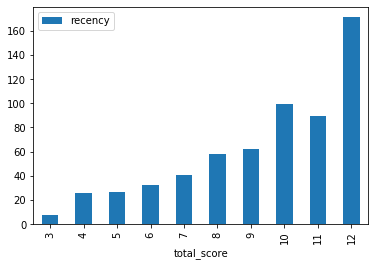

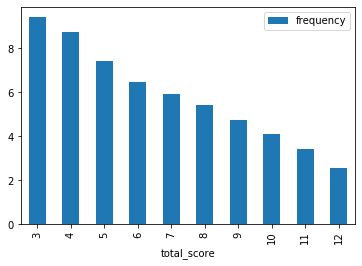

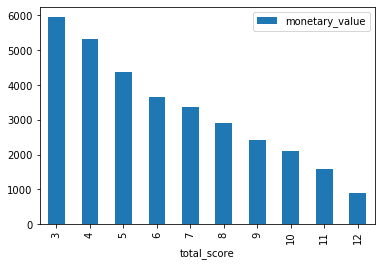

In [62]:
# Totalscore in relation to RFM

demo_addr_trans.groupby('total_score').agg('recency').mean().to_frame().plot(kind='bar') #Recency
demo_addr_trans.groupby('total_score').agg('frequency').mean().to_frame().plot(kind='bar')# Frequency
demo_addr_trans.groupby('total_score').agg('monetary_value').mean().to_frame().plot(kind='bar') # Monetary Value
plt.show()

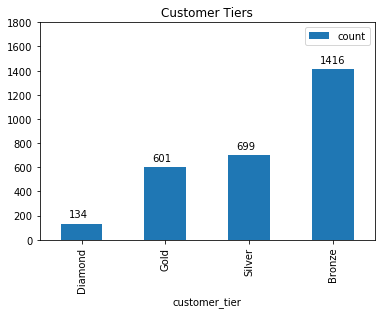

In [65]:
# Graph visualizing counts of Customer Tiers

customer_tiers = demo_addr_trans.groupby('customer_tier').agg({
    'rfm_class': lambda x: len(x)
})
customer_tiers.rename(columns={'rfm_class': 'count'}, inplace=True)

customer_tiers.sort_values('count').plot(kind='bar')

for i, v in enumerate(customer_tiers.sort_values('count')['count']):
    plt.text(i - .15, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1800])
plt.title('Customer Tiers')
plt.show()

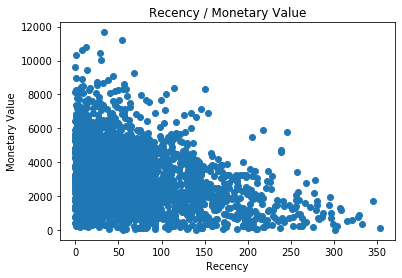

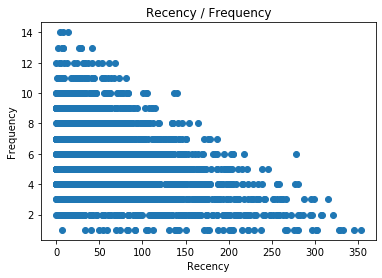

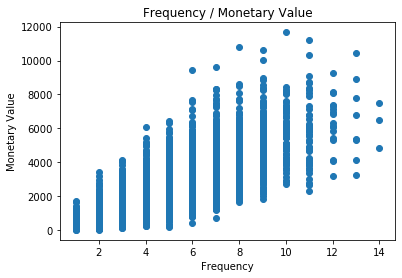

In [69]:
# Visualizing Relation between RFM values 


# Recency and Average Monetry Value
plt.scatter(demo_addr_trans['recency'], demo_addr_trans['monetary_value'])
plt.title('Recency / Monetary Value')
plt.xlabel('Recency')
plt.ylabel('Monetary Value')
plt.show()

# Recency and Frequency
plt.scatter(demo_addr_trans['recency'], demo_addr_trans['frequency'])
plt.title('Recency / Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

# Frequency and Average Monetry Value
plt.scatter(demo_addr_trans['frequency'], demo_addr_trans['monetary_value'])
plt.title('Frequency / Monetary Value')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.show()

## Showing relationship between customer attributes

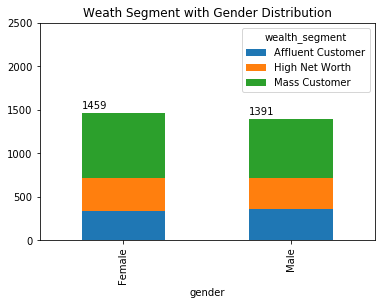

In [74]:
# Gender and Wealth 

demo_addr_trans.groupby('gender')['wealth_segment'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(demo_addr_trans.groupby('gender') \
                      .agg({'wealth_segment': lambda x: len(x)})['wealth_segment']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 2500])
plt.title('Weath Segment with Gender Distribution')
plt.show()

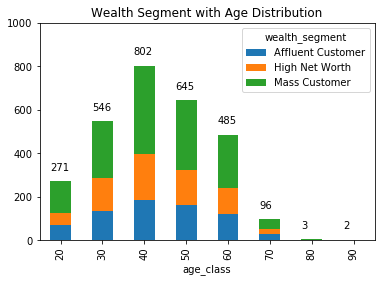

In [77]:
# Wealth and Age 

demo_addr_trans.groupby('age_class')['wealth_segment'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(demo_addr_trans.groupby('age_class') \
                      .agg({'wealth_segment': lambda x: len(x)})['wealth_segment']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Wealth Segment with Age Distribution')
plt.show()

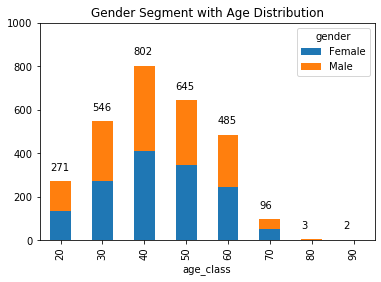

In [78]:
# Gender and Age 

demo_addr_trans.groupby('age_class')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(demo_addr_trans.groupby('age_class') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Gender Segment with Age Distribution')
plt.show()

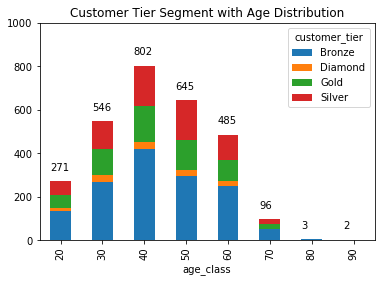

In [81]:
# Customer Tier and Age 

demo_addr_trans.groupby('age_class')['customer_tier'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(demo_addr_trans.groupby('age_class') \
                      .agg({'customer_tier': lambda x: len(x)})['customer_tier']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Customer Tier Segment with Age Distribution')
plt.show()

# 
# Tier System
    
#     Diamond
#        |
#      Gold
#        |
#      Silver
#        |
#      Bronze



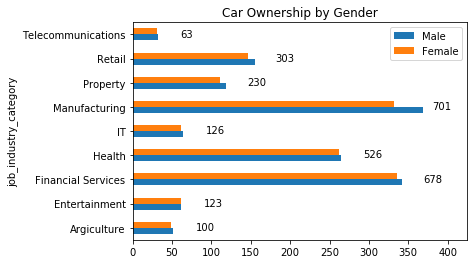

In [208]:
#Car Ownership to Job industry

demo_addr_trans.groupby('job_industry_category')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(demo_addr_trans.groupby('job_industry_category') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(v // 2 + 30, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,425])
plt.title('Car Ownership by Gender')
plt.legend(['Male', 'Female'], loc='upper right')
plt.show()

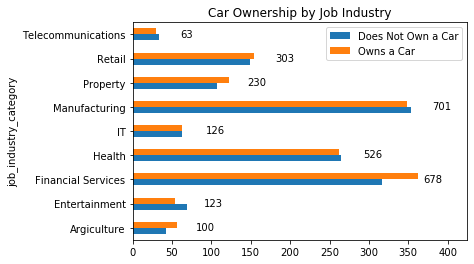

In [84]:
#Car Ownership to Job industry

demo_addr_trans.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(demo_addr_trans.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 30, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,425])
plt.title('Car Ownership by Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

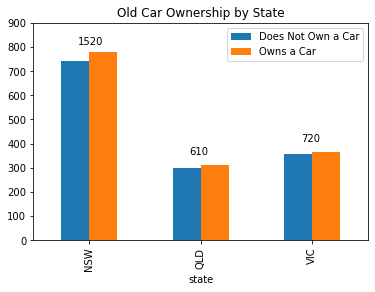

In [88]:
# Car ownership and State

demo_addr_trans.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(demo_addr_trans.groupby('state') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 900])
plt.title('Old Car Ownership by State')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

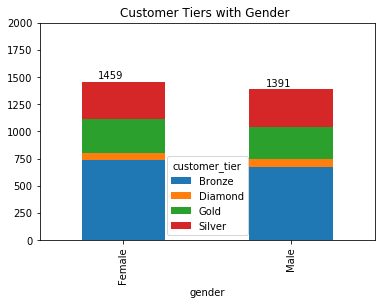

In [205]:
#Customer tiers and State

demo_addr_trans.groupby('gender')['customer_tier'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(demo_addr_trans.groupby('gender') \
                      .agg({'customer_tier': lambda x: len(x)})['customer_tier']):
    plt.text(i - .15, v + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 2000])
plt.title('Customer Tiers with Gender ')
plt.show()

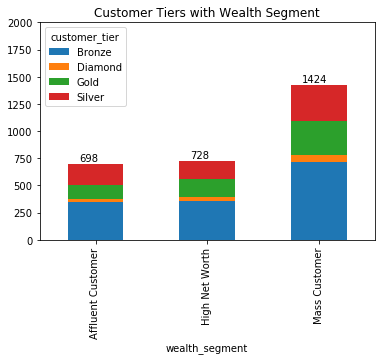

In [204]:
#Customer tiers and State

demo_addr_trans.groupby('wealth_segment')['customer_tier'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(demo_addr_trans.groupby('wealth_segment') \
                      .agg({'customer_tier': lambda x: len(x)})['customer_tier']):
    plt.text(i - .15, v + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 2000])
plt.title('Customer Tiers with Wealth Segment')
plt.show()

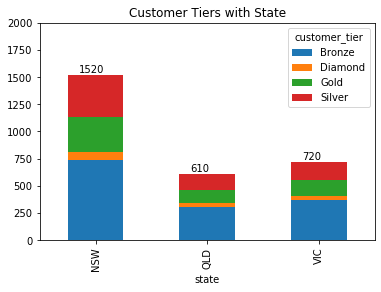

In [96]:
#Customer tiers and State

demo_addr_trans.groupby('state')['customer_tier'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(demo_addr_trans.groupby('state') \
                      .agg({'customer_tier': lambda x: len(x)})['customer_tier']):
    plt.text(i - .15, v + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 2000])
plt.title('Customer Tiers with State')
plt.show()

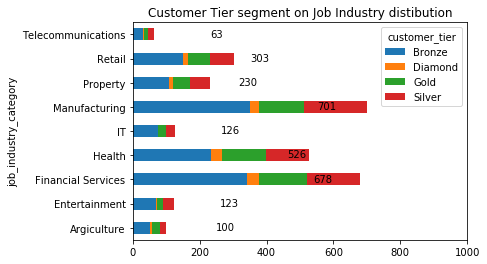

In [108]:
#Customer Tier to Job industry

demo_addr_trans.groupby('job_industry_category')['customer_tier'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=True)
for i, v in enumerate(demo_addr_trans.groupby('job_industry_category') \
                      .agg({'customer_tier': lambda x: len(x)})['customer_tier']):
    plt.text(v // 2 + 200, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,1000])
plt.title('Customer Tier segment on Job Industry distibution')

plt.show()

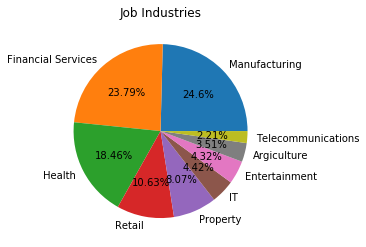

In [110]:
#Job Industry Pie Distribution

demo_addr_trans.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('Job Industries')
plt.ylabel('')
plt.show()

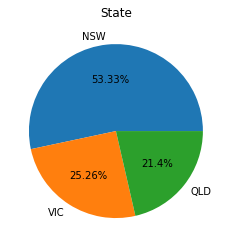

In [112]:
#State Pie Distribution

demo_addr_trans.state.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('State')
plt.ylabel('')
plt.show()

In [115]:
#Customer tier count

count = demo_addr_trans.groupby('customer_tier').agg({'age': lambda x: len(x)})
count.rename(columns={'age':'count'},inplace=True)
count['count'] = count['count'].astype(int)
count

,count
customer_tier,
Bronze,1416
Diamond,134
Gold,601
Silver,699


## New customer Data Analysis


In [117]:
#load in New Cusatomer Data

new_cust_list = pd.read_excel(filename, header=1, sheet_name='NewCustomerList')
new_cust_list.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [118]:
# Analyze null records 

new_cust_list.isna().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [119]:
# Dimensions 

new_cust_list.shape

(1000, 23)

In [120]:
#Drop Null values 

new_cust_list_clean = new_cust_list.dropna()
new_cust_list_clean

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.875000,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.112500,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.010000,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.087500,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.650000,0.650000,4,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.79,0.7900,0.790000,0.790000,996,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.76,0.7600,0.950000,0.807500,997,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.85,1.0625,1.062500,1.062500,997,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,1.09,1.3625,1.362500,1.158125,997,997,0.357000


In [123]:
#calculate Age and age class columns 

new_cust_list_clean['age'] = (dt.datetime.now() - new_cust_list_clean['DOB']) / np.timedelta64(1, 'Y')
new_cust_list_clean['age_class'] = ((round(new_cust_list_clean['age'] / 10)) * 10).astype(int)
new_cust_list_clean.head()

C:\Users\POWER-HOUSE\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\POWER-HOUSE\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age,age_class
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750,63.496796,60
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750,50.803859,50
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750,46.368449,50
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125,41.949467,40
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125,55.302240,60


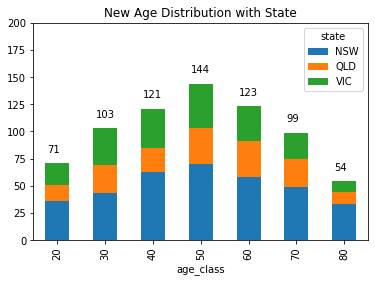

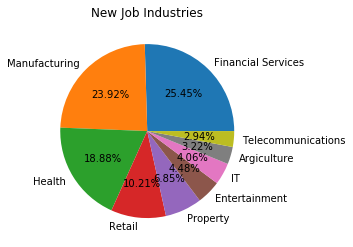

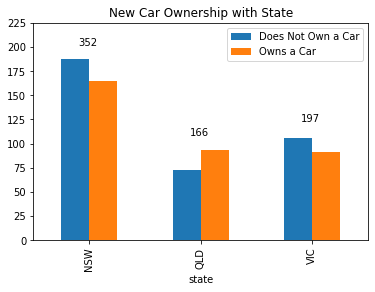

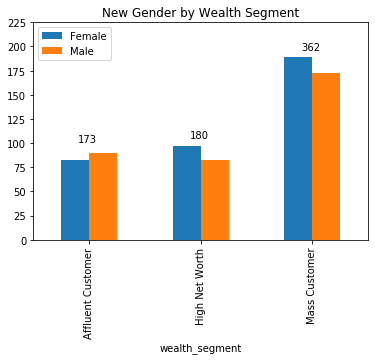

In [125]:
# New customer list distributions 

#Age and State
new_cust_list_clean.groupby('age_class')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(new_cust_list_clean.groupby('age_class').agg({'age': lambda x: len(x)})['age']):
    plt.text(i - .2, v + 10, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 200])
plt.title('New Age Distribution with State')
plt.show()


#JOb Industries
new_cust_list_clean.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('New Job Industries')
plt.ylabel('')
plt.show()

#State and Car ownership
new_cust_list_clean.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(new_cust_list_clean.groupby('state').agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 225])
plt.title('New Car Ownership with State')
plt.legend(['Does Not Own a Car', 'Owns a Car'])
plt.show()


new_cust_list_clean.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(new_cust_list_clean.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v // 2 + 15, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 225])
plt.title('New Gender by Wealth Segment')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

In [209]:
#Create customer segments 

demo_addr_trans['customer_segment'] = demo_addr_trans['total_score'].map({
    3: 'Allegiant ',
    4: 'Very Loyal',
    5: 'Becoming Loyal',
    6: 'Active',
    7: 'Average',
    8: 'High Risk',
    9: 'Evasive',
    10: 'Losing',
    11: 'Inactive',
    12: 'Lost'
})

demo_addr_trans

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_tier,gender,...,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation,customer_segment
customer_id,,,,,,,,,,,,,,,,,,,,,
1,7.0,11,3018.09,1,1,3,113,5,Gold,Female,...,1,11.0,67.0,70,060 Morning Avenue,2016,NSW,Australia,10,Becoming Loyal
2,128.0,3,2226.26,4,4,2,442,10,Bronze,Male,...,1,16.0,40.0,40,6 Meadow Vale Court,2153,NSW,Australia,10,Losing
4,195.0,2,220.57,4,4,4,444,12,Bronze,Male,...,0,7.0,59.0,60,0 Holy Cross Court,4211,QLD,Australia,9,Lost
6,64.0,5,3946.55,3,2,3,323,8,Bronze,Male,...,1,13.0,54.0,50,9 Oakridge Court,3216,VIC,Australia,9,High Risk
7,253.0,3,220.11,4,4,4,444,12,Bronze,Female,...,1,11.0,44.0,40,4 Delaware Trail,2210,NSW,Australia,9,Lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,256.0,4,2045.84,4,4,2,442,10,Bronze,Male,...,1,19.0,34.0,30,2565 Caliangt Point,2171,NSW,Australia,9,Losing
3497,52.0,3,1648.32,3,4,4,344,11,Bronze,Female,...,1,18.0,34.0,30,96 Delladonna Trail,3976,VIC,Australia,5,Inactive
3498,127.0,6,3147.33,4,3,3,433,10,Bronze,Female,...,0,5.0,25.0,30,3 Nova Point,3012,VIC,Australia,4,Losing


In [239]:
   
counts = demo_addr_trans['customer_segment'].value_counts()
counts

High Risk         412
Average           409
Evasive           398
Active            333
Losing            307
Becoming Loyal    262
Lost              255
Inactive          178
Very Loyal        162
Allegiant         134
Name: customer_segment, dtype: int64

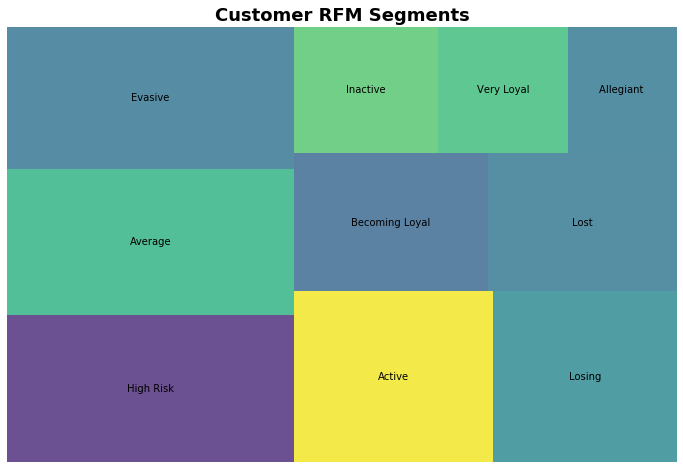

In [240]:
#Visualize customer rfm Segment plot

import squarify

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(12, 8)
squarify.plot(sizes=counts.values, 
              label=counts.index, alpha=0.8 )
plt.title("Customer RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

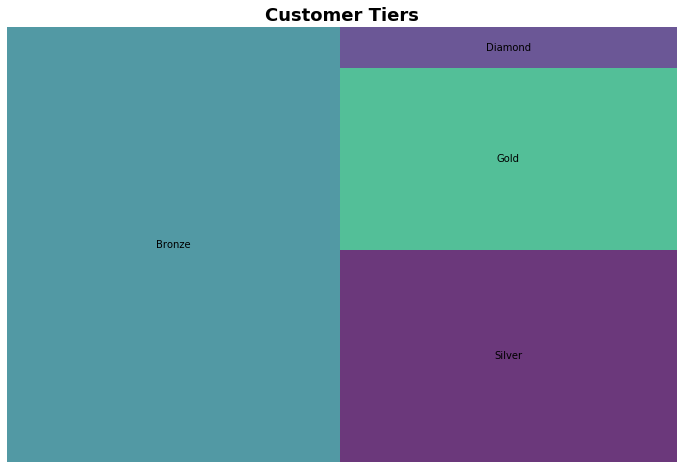

In [244]:
#Visualize customer tiers plot

import squarify

c = demo_addr_trans['customer_tier'].value_counts()
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(12, 8)
squarify.plot(sizes=c.values ,
              label=c.index, alpha=0.8 )
plt.title("Customer Tiers",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

## Implementing to A Neuarl Network Model 

Using a Neural Network model to predict the customer segment a user will fall into 

In [156]:
import tensorflow as tf 
from tensorflow import keras


In [164]:
'''
Features 

past 3 years purchase
Age
Job industry
Weath segment
Owns a car
Property Value
State
Gender


prediction

Total_score
'''

train_data = demo_addr_trans[['age_class','gender','past_3_years_bike_related_purchases','wealth_segment','owns_car','property_valuation', 'state', 'job_industry_category', 'total_score']] 

train_data

,age_class,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,property_valuation,state,job_industry_category,total_score
customer_id,,,,,,,,,
1,70,Female,93,Mass Customer,1,10,NSW,Health,5
2,40,Male,81,Mass Customer,1,10,NSW,Financial Services,10
4,60,Male,33,Mass Customer,0,9,QLD,IT,12
6,50,Male,35,High Net Worth,1,9,VIC,Retail,8
7,40,Female,6,Affluent Customer,1,9,NSW,Financial Services,12
...,...,...,...,...,...,...,...,...,...
3496,30,Male,99,Mass Customer,1,9,NSW,Manufacturing,10
3497,30,Female,73,Affluent Customer,1,5,VIC,Manufacturing,11
3498,30,Female,28,Mass Customer,0,4,VIC,Manufacturing,10


In [192]:
# Encode Values 

from sklearn import linear_model, preprocessing


le = preprocessing.LabelEncoder()


train_data['gender'] = le.fit_transform(list(train_data['gender']))
train_data['wealth_segment'] = le.fit_transform(list(train_data['wealth_segment']))
train_data['state'] = le.fit_transform(list(train_data['state']))
train_data['job_industry_category'] = le.fit_transform(list(train_data['job_industry_category']))
train_data['total_score'] = le.fit_transform(list(train_data['total_score']))

train_data

C:\Users\POWER-HOUSE\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\POWER-HOUSE\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\POWER-HOUSE\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,age_class,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,property_valuation,state,job_industry_category,total_score
customer_id,,,,,,,,,
1,70,0,93,2,1,10,0,3,2
2,40,1,81,2,1,10,0,2,7
4,60,1,33,2,0,9,1,4,9
6,50,1,35,1,1,9,2,7,5
7,40,0,6,0,1,9,0,2,9
...,...,...,...,...,...,...,...,...,...
3496,30,1,99,2,1,9,0,5,7
3497,30,0,73,0,1,5,2,5,8
3498,30,0,28,2,0,4,2,5,7


In [193]:
X = train_data.drop('total_score', axis =1).values
Y = train_data['total_score'].values


In [194]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.1)


In [203]:
Y

array([2, 7, 9, ..., 7, 4, 8], dtype=int64)

In [198]:
#Creating our model

model = keras.Sequential([
	keras.layers.Dense(8, activation='relu'),
	keras.layers.Dense(4, activation="relu"),
	keras.layers.Dense(10, activation="softmax")
	])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


model.fit(x_train, y_train, epochs=5)

Train on 2565 samples
Epoch 1/5
2565/2565 [==============================] - 2s 622us/sample - loss: 6.6640 - accuracy: 0.0507
Epoch 2/5
2565/2565 [==============================] - 0s 154us/sample - loss: 5.5636 - accuracy: 0.0624
Epoch 3/5
2565/2565 [==============================] - 0s 191us/sample - loss: 3.4657 - accuracy: 0.0881
Epoch 4/5
2565/2565 [==============================] - 0s 185us/sample - loss: 2.5726 - accuracy: 0.0897
Epoch 5/5
2565/2565 [==============================] - 0s 160us/sample - loss: 2.3135 - accuracy: 0.0916


In [245]:
demo_addr_trans

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_tier,gender,...,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation,customer_segment
customer_id,,,,,,,,,,,,,,,,,,,,,
1,7.0,11,3018.09,1,1,3,113,5,Gold,Female,...,1,11.0,67.0,70,060 Morning Avenue,2016,NSW,Australia,10,Becoming Loyal
2,128.0,3,2226.26,4,4,2,442,10,Bronze,Male,...,1,16.0,40.0,40,6 Meadow Vale Court,2153,NSW,Australia,10,Losing
4,195.0,2,220.57,4,4,4,444,12,Bronze,Male,...,0,7.0,59.0,60,0 Holy Cross Court,4211,QLD,Australia,9,Lost
6,64.0,5,3946.55,3,2,3,323,8,Bronze,Male,...,1,13.0,54.0,50,9 Oakridge Court,3216,VIC,Australia,9,High Risk
7,253.0,3,220.11,4,4,4,444,12,Bronze,Female,...,1,11.0,44.0,40,4 Delaware Trail,2210,NSW,Australia,9,Lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,256.0,4,2045.84,4,4,2,442,10,Bronze,Male,...,1,19.0,34.0,30,2565 Caliangt Point,2171,NSW,Australia,9,Losing
3497,52.0,3,1648.32,3,4,4,344,11,Bronze,Female,...,1,18.0,34.0,30,96 Delladonna Trail,3976,VIC,Australia,5,Inactive
3498,127.0,6,3147.33,4,3,3,433,10,Bronze,Female,...,0,5.0,25.0,30,3 Nova Point,3012,VIC,Australia,4,Losing


In [249]:
import openpyxl
demo_addr_trans.to_excel('sprocket_customers.xlsx')